In [1]:
#here is the link to the dataset "https://www.kaggle.com/datasets/heptapod/titanic"

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/Hp/Desktop/pyth/data sets/titanic_data.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.shape

(1309, 28)

In [5]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [6]:
df.nunique()

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
zero              1
zero.1            1
zero.2            1
zero.3            1
zero.4            1
zero.5            1
zero.6            1
Parch             8
zero.7            1
zero.8            1
zero.9            1
zero.10           1
zero.11           1
zero.12           1
zero.13           1
zero.14           1
Pclass            3
zero.15           1
zero.16           1
Embarked          3
zero.17           1
zero.18           1
2urvived          2
dtype: int64

In [7]:
df=df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero','zero.7','zero.8','zero.9','zero.10',
                  'zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [8]:
df.rename(columns={'2urvived':'survived','Pclass':'class'},inplace=True)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,class,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [9]:
df.shape

(1309, 9)

In [10]:
df.nunique()

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
Parch             8
class             3
Embarked          3
survived          2
dtype: int64

In [11]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
class          0
Embarked       2
survived       0
dtype: int64

In [12]:
df['Embarked'].unique()

array([ 2.,  0.,  1., nan])

In [13]:
df['Embarked'].fillna(df['Embarked'].median(),inplace=True)
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
class          0
Embarked       0
survived       0
dtype: int64

In [14]:
correlation = df.corr()

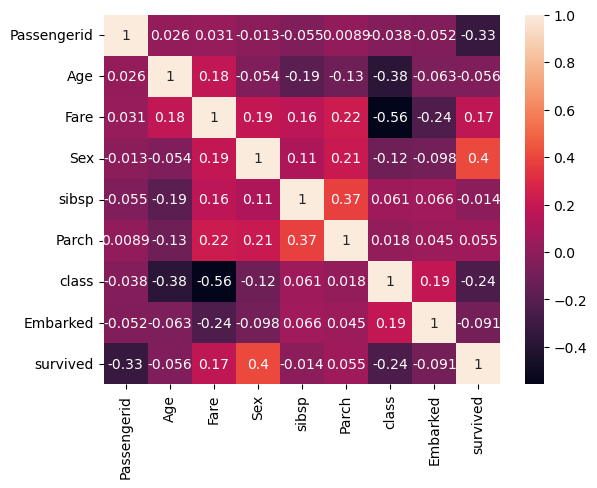

In [15]:
sns.heatmap(correlation,xticklabels=df.columns,yticklabels=df.columns,annot=True)
plt.show()

In [16]:
#from the heatmap we can see 'passengerid,fare,sex,class' have some positive or negative relation with survived and
# other variables also have some relation but variables listed above have a stronger relation 
#"i don't know why passengerid have a very strong relation with survived passengers maybe passengers with lower
#value of passenger id were given more priority in escaping the ship"
#"fare have a positive relation with survived i.e., passengers who paid more survived more than with lower fare passengers"
#"sex have the strongest relation with survived variable i.e., female survived more than males"
#'class also have a strong negative relation with survived i.e., people with lower value of class (i.e. 1<2<3) survived more'

In [17]:
#here are some graphs of variables which show strong relation 

<Axes: xlabel='class', ylabel='Age'>

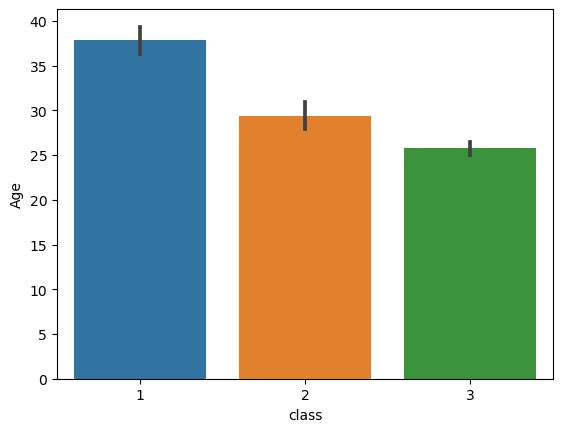

In [18]:
sns.barplot(x="class",y='Age',data=df)

<Axes: xlabel='class', ylabel='Age'>

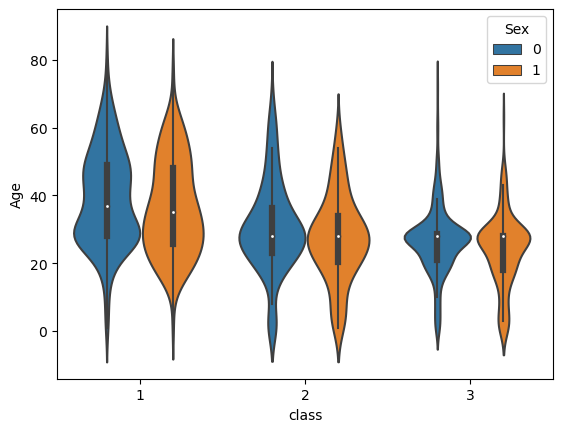

In [19]:
sns.violinplot(x="class",y='Age',hue='Sex',data=df)

In [20]:
#sns.pairplot(df)

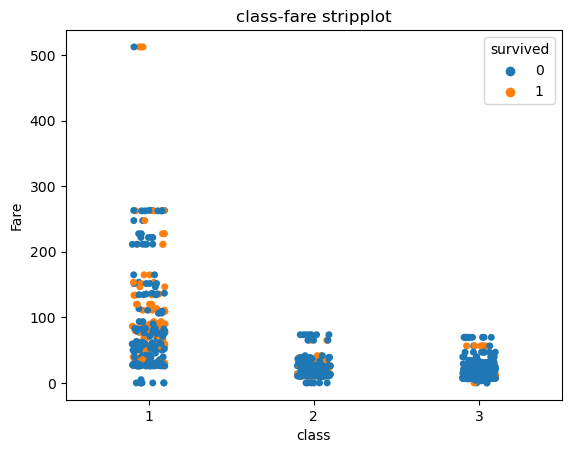

In [21]:
sns.stripplot(x='class',y='Fare',jitter=True,hue='survived',data= df).set_title('class-fare stripplot')
plt.show()

In [22]:
#1st class passengers on an average paid more than 2nd and 3rd class passengers

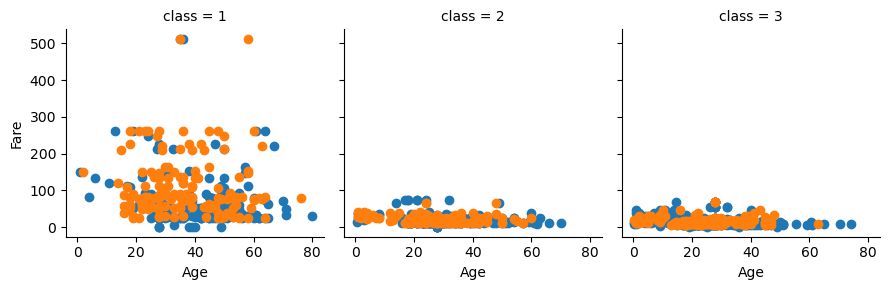

In [23]:
grid = sns.FacetGrid(df,col='class',hue='Sex')
grid.map(plt.scatter,'Age','Fare')

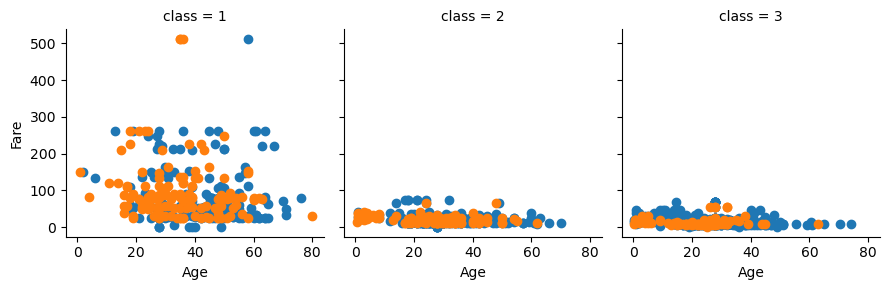

In [24]:
grid = sns.FacetGrid(df,col='class',hue='survived')
grid.map(plt.scatter,'Age','Fare')

In [25]:
#so to summarize 
#passengers who paid more or in other words order of survivals was "1st class < 2nd class < 3rd class"
#and female survived more than males

In [26]:
#if you want higher survival rate in an incident like titanic you should buy higher priced tickets in premium classes
#or you must be a female or both together